Part IV: Template Matching

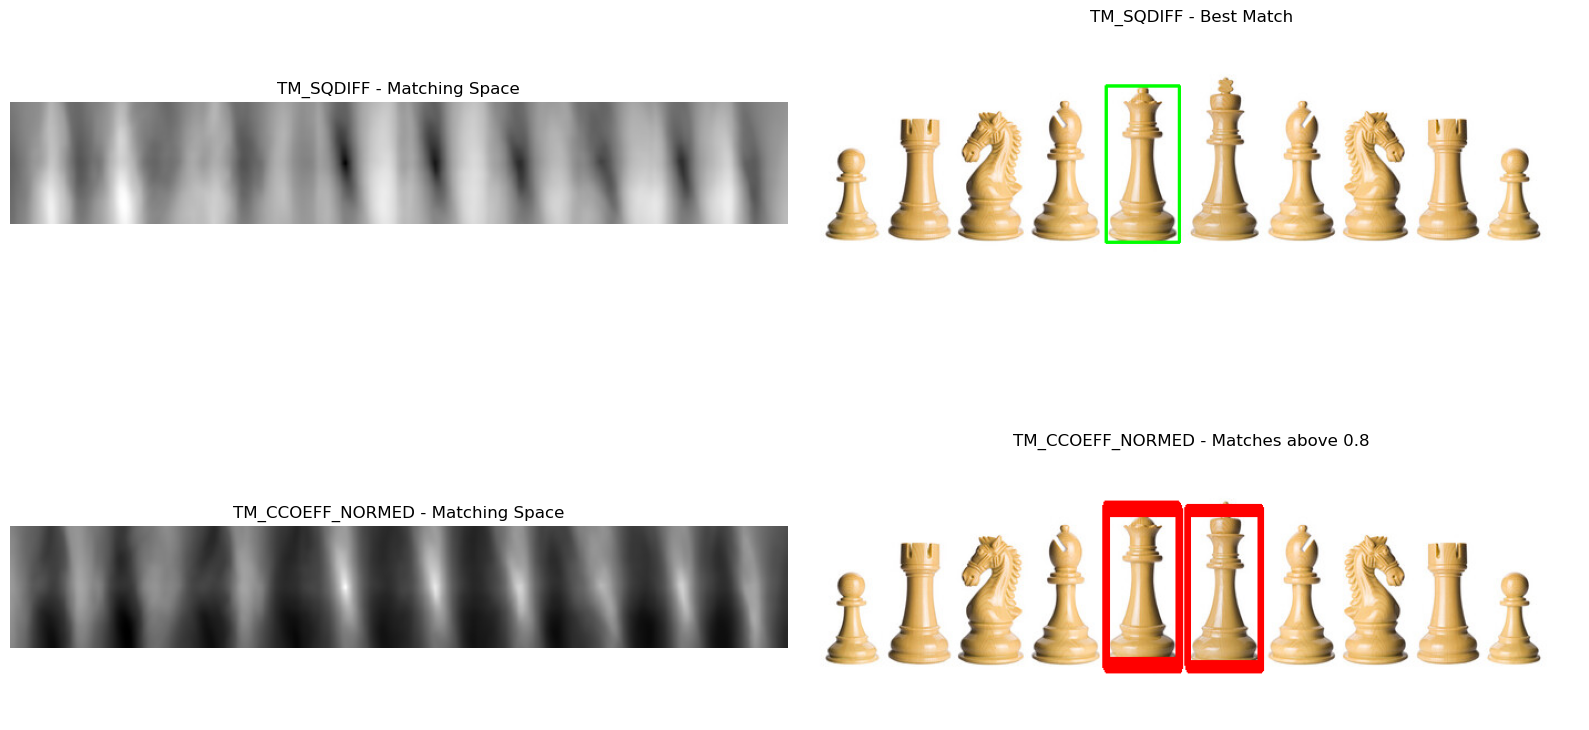

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale images for matching
img_gray = cv.imread('pictures/Chess_Pieces.jpg', cv.IMREAD_GRAYSCALE)
template = cv.imread('pictures/Queen.jpg', cv.IMREAD_GRAYSCALE)

# Load RGB images for drawing
img_rgb_sqdiff = cv.imread('pictures/Chess_Pieces.jpg')  
img_rgb_ccoeff = img_rgb_sqdiff.copy()

# Get template size
w, h = template.shape[::-1]


# Method: TM_SQDIFF + draw match + show match space

res_sqdiff = cv.matchTemplate(img_gray, template, cv.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res_sqdiff)
top_left_sqdiff = min_loc
bottom_right_sqdiff = (top_left_sqdiff[0] + w, top_left_sqdiff[1] + h)
cv.rectangle(img_rgb_sqdiff, top_left_sqdiff, bottom_right_sqdiff, (0, 255, 0), 2)


# TM_CCOEFF_NORMED + draw all matches > threshold
res_ccoeff = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res_ccoeff >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb_ccoeff, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)  # red box

# Visualization
plt.figure(figsize=(16, 10))

# TM_SQDIFF result heatmap
plt.subplot(2, 2, 1)
plt.title("TM_SQDIFF - Matching Space")
plt.imshow(res_sqdiff, cmap='gray')
plt.axis('off')

# TM_SQDIFF detected location
plt.subplot(2, 2, 2)
plt.title("TM_SQDIFF - Best Match")
plt.imshow(cv.cvtColor(img_rgb_sqdiff, cv.COLOR_BGR2RGB))
plt.axis('off')

# TM_CCOEFF result heatmap
plt.subplot(2, 2, 3)
plt.title("TM_CCOEFF_NORMED - Matching Space")
plt.imshow(res_ccoeff, cmap='gray')
plt.axis('off')

# TM_CCOEFF detected matches
plt.subplot(2, 2, 4)
plt.title("TM_CCOEFF_NORMED - Matches above 0.8")
plt.imshow(cv.cvtColor(img_rgb_ccoeff, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()
